<h1 style="color:blue">Introduction</h1>

This project aims to develop a scalable animal disease classification system by leveraging big data analytics and machine learning techniques. This system will enable efficient disease surveillance, early outbreak prediction, and data-driven decision-making for animal health management.

<h2 style="color:blue">Importing Project Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

<h2 style="color:blue">Exploratory Data Analysis & Visualizations</h2> 

In [2]:
# Load the dataset
data = pd.read_csv('Data/data.csv')

In [3]:
data.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous,Type_of_Disease
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes,Respiratory
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes,Gastrointestinal
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes,Respiratory
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes,Respiratory
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes,Respiratory


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AnimalName       1071 non-null   object
 1   symptoms1        1071 non-null   object
 2   symptoms2        1071 non-null   object
 3   symptoms3        1071 non-null   object
 4   symptoms4        1071 non-null   object
 5   symptoms5        1071 non-null   object
 6   Dangerous        1068 non-null   object
 7   Type_of_Disease  1071 non-null   object
dtypes: object(8)
memory usage: 67.1+ KB


In [5]:
data.describe()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous,Type_of_Disease
count,1071,1071,1071,1071,1071,1071,1068,1071
unique,51,240,239,235,223,211,2,3
top,Buffaloes,Fever,Diarrhea,Coughing,Weight loss,Pains,Yes,Respiratory
freq,129,267,132,95,129,99,978,873


In [6]:
# Handling missing values
data.fillna('Unknown', inplace=True)

In [7]:
#Identifying the Animal Counts
data.AnimalName.value_counts()

AnimalName
Buffaloes            129
Sheep                126
Pig                   77
Elephant              69
Duck                  66
Fowl                  62
Dog                   42
Monkey                40
Deer                  38
Donkey                38
Birds                 37
cat                   36
Goat                  36
Hamster               31
Tiger                 30
Lion                  25
Chicken               22
Cattle                21
Rabbit                20
Horse                 18
Turtle                15
Fish                  11
Guinea Pig            10
Cow                    9
Cat                    8
Fox                    7
Other Birds            6
Parrot                 6
horse                  5
chicken                4
Pigs                   3
cow                    3
Goats                  2
donkey                 2
cattle                 1
mammal                 1
Hyaenas                1
Wolves                 1
Dogs                   1
snake         

In [8]:
data['AnimalName']=data.AnimalName.str.capitalize()

In [9]:
data.AnimalName.value_counts()

AnimalName
Buffaloes            129
Sheep                126
Pig                   77
Elephant              69
Duck                  67
Fowl                  62
Cat                   44
Dog                   42
Donkey                40
Monkey                40
Deer                  38
Birds                 37
Goat                  36
Hamster               31
Tiger                 30
Chicken               26
Lion                  25
Horse                 23
Cattle                22
Rabbit                20
Turtle                15
Cow                   12
Fish                  11
Guinea pig            10
Fox                    7
Parrot                 6
Other birds            6
Pigs                   3
Goats                  2
Wapiti                 1
Mammal                 1
Fox                    1
Hyaenas                1
Wolves                 1
Dogs                   1
Elk                    1
Mules                  1
Moos                   1
Reindeer               1
White-tailed d

In [10]:
for col in data.columns: 
    print(f'Type of {col} column is {data[col].dtype}')

Type of AnimalName column is object
Type of symptoms1 column is object
Type of symptoms2 column is object
Type of symptoms3 column is object
Type of symptoms4 column is object
Type of symptoms5 column is object
Type of Dangerous column is object
Type of Type_of_Disease column is object


C:\Users\kevzm\AppData\Local\Temp\ipykernel_8364\2957651839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='AnimalName', palette='rainbow')


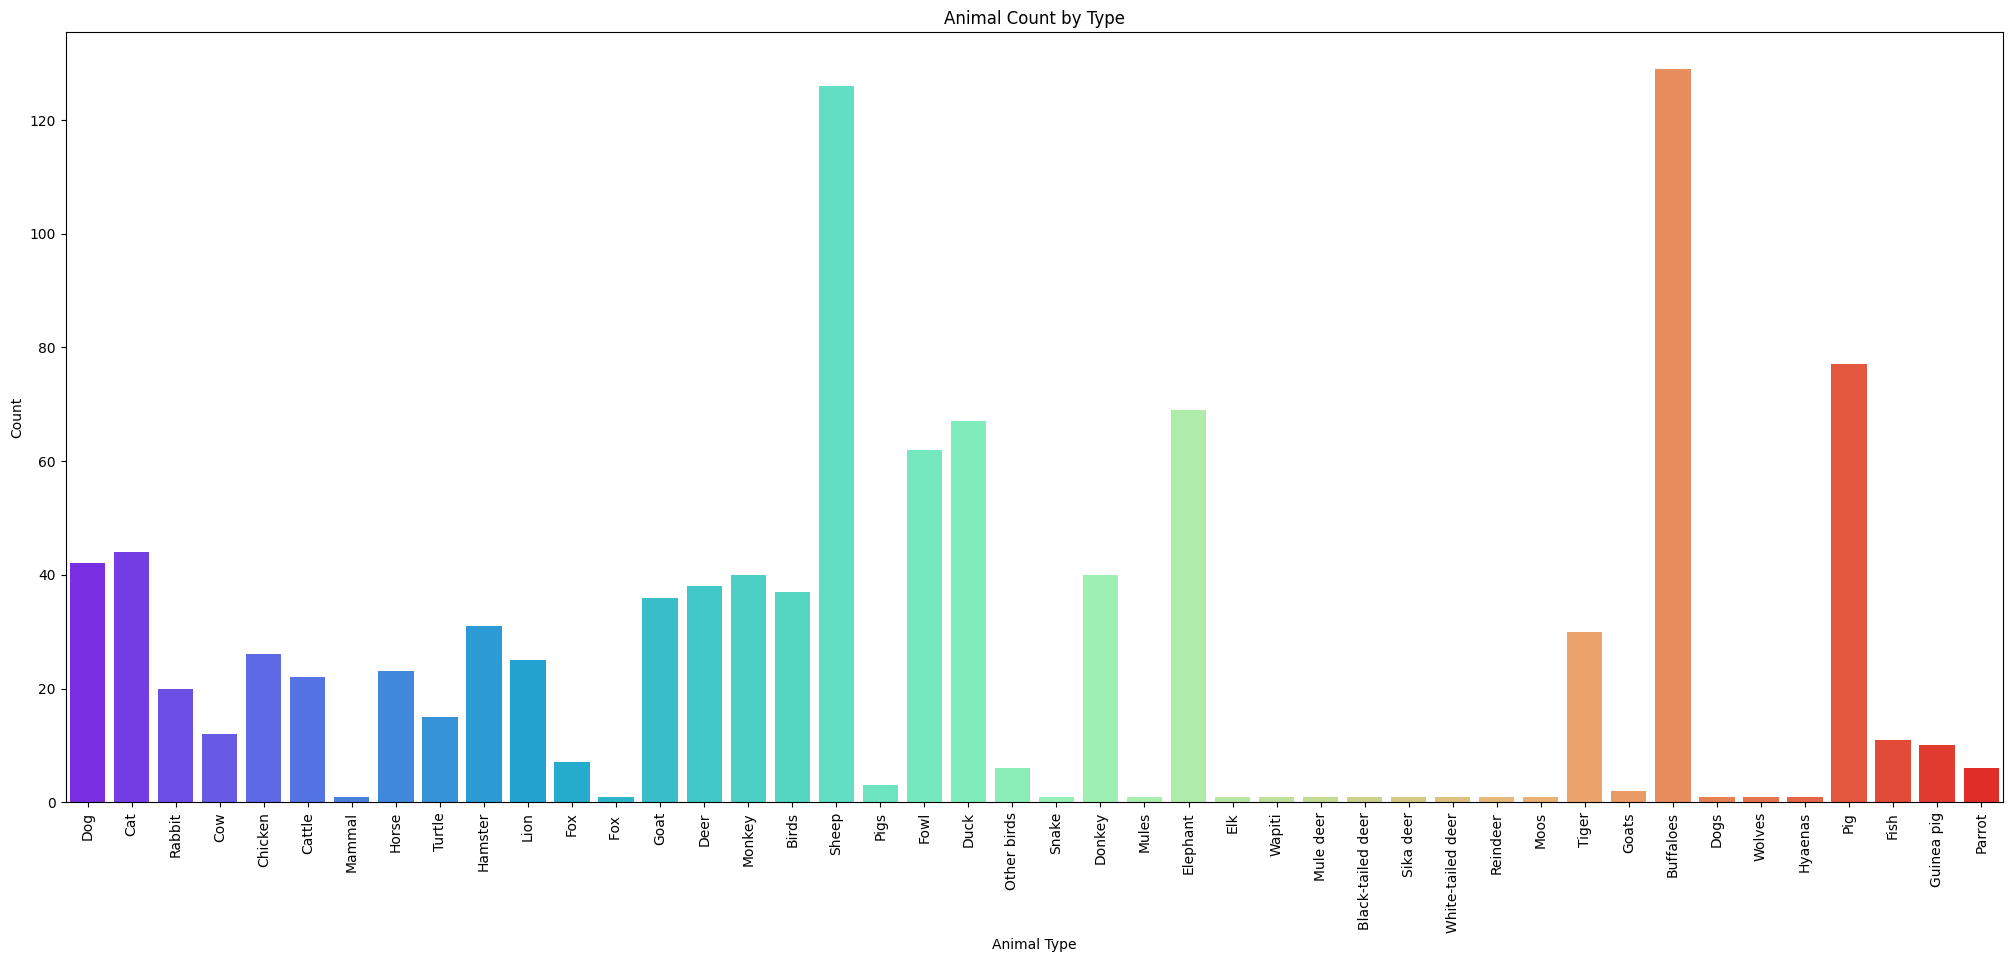

In [11]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x='AnimalName', palette='rainbow')
plt.title('Animal Count by Type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Encoding categorical variables
le = LabelEncoder()
data['AnimalName'] = le.fit_transform(data['AnimalName'])
for col in ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']:
    data[col] = le.fit_transform(data[col])
data['Dangerous'] = data['Dangerous'].map({'Yes': 1, 'No': 0})

In [13]:
# Removing any rows with NaN in target variable (although filled with 'Unknown', just in case)
data = data.dropna(subset=['Dangerous'])

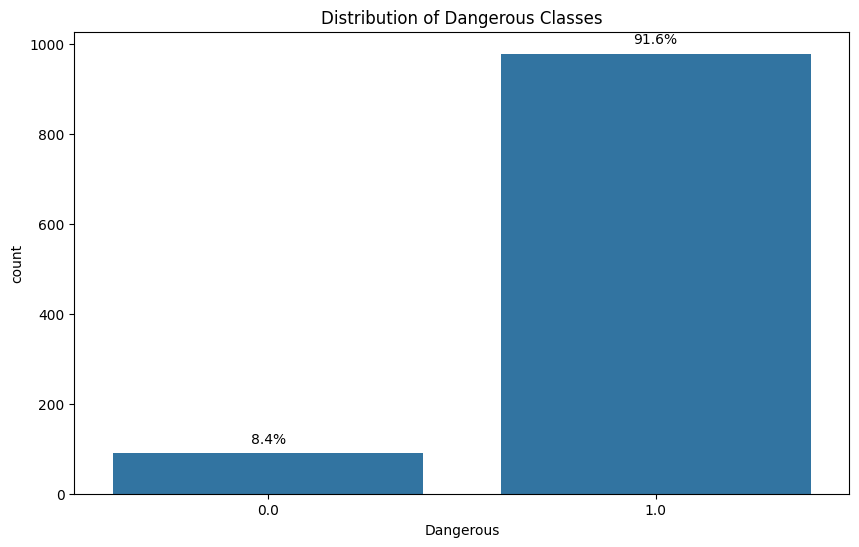

In [14]:
# Plotting the Distribution of the target variable (Dangerous)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Dangerous', data=data)

# Calculate the percentage distribution
total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Dangerous Classes')
plt.show()

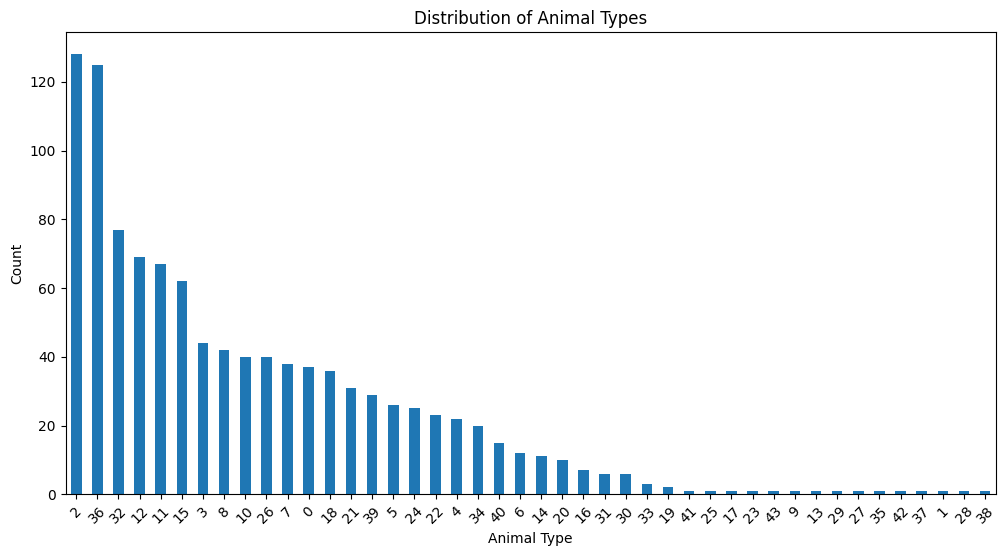

In [15]:
# Plotting the Distribution of animal types
plt.figure(figsize=(12, 6))
data['AnimalName'].value_counts().plot(kind='bar')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

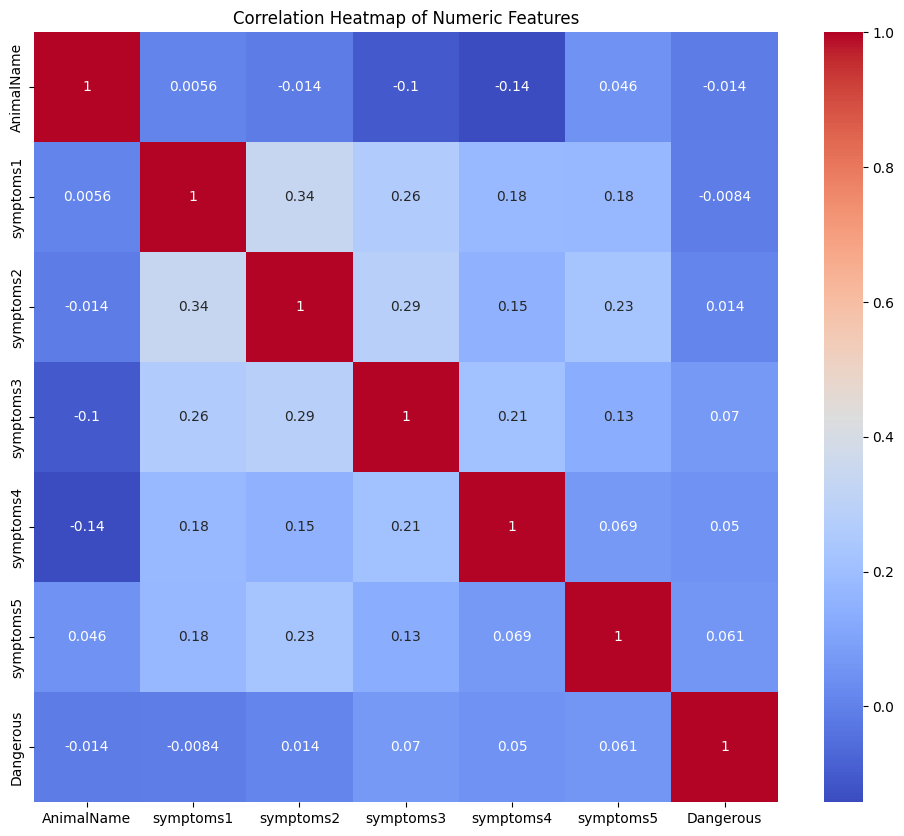

In [16]:
# Visualizing the Correlation heatmap of numeric features
numeric_cols = data.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

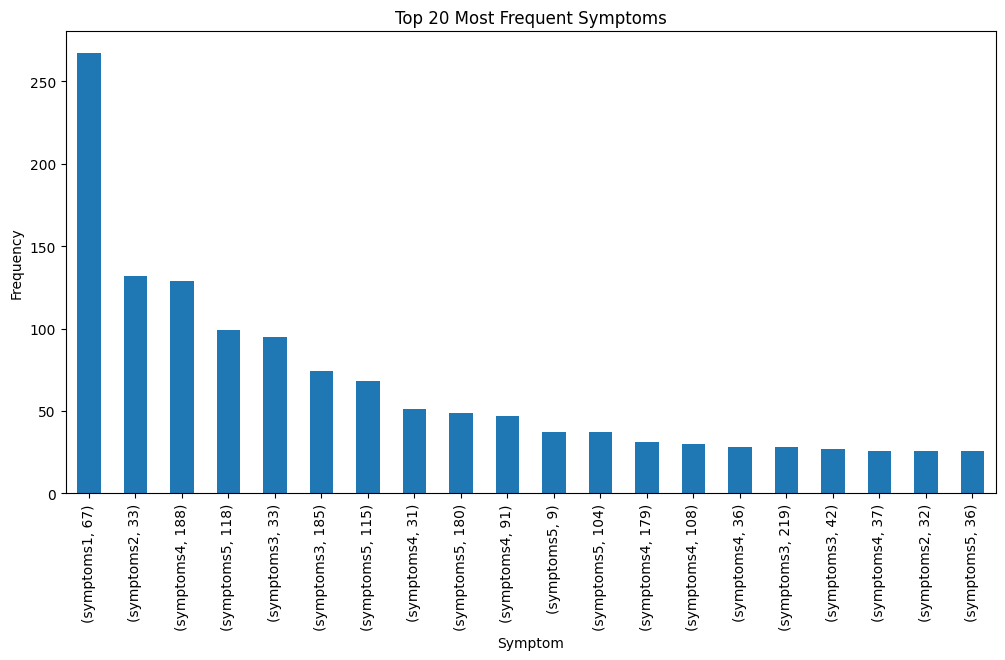

In [17]:
# Visualizing the Symptom frequency
symptoms = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
symptom_counts = data[symptoms].melt().value_counts()
plt.figure(figsize=(12, 6))
symptom_counts[:20].plot(kind='bar')
plt.title('Top 20 Most Frequent Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

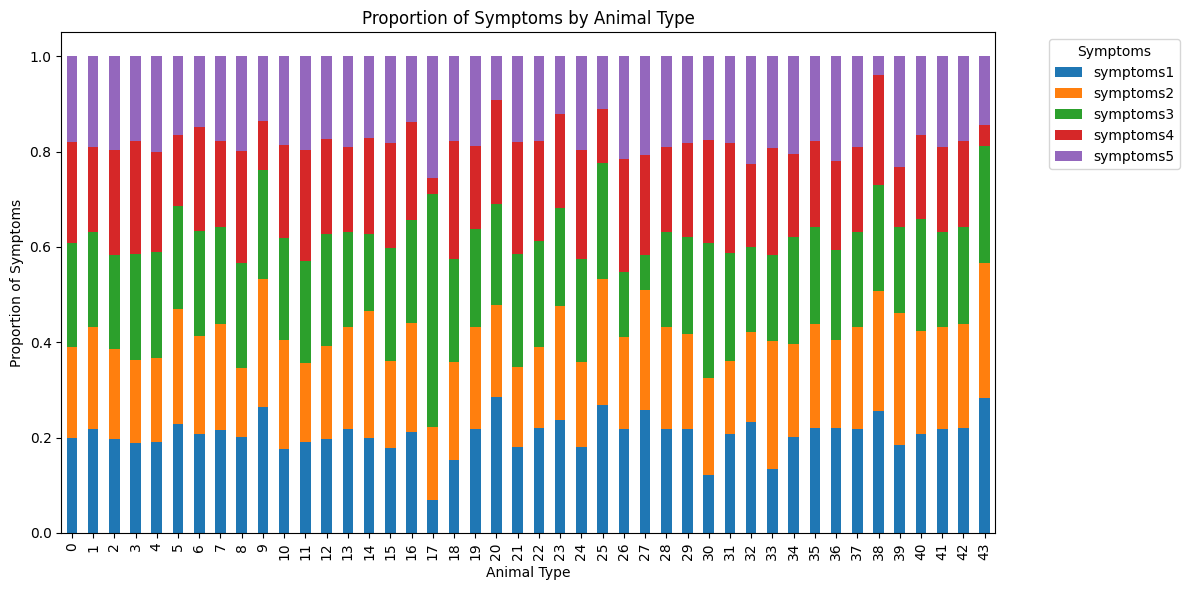

In [18]:
# Visualizing the Stacked bar chart of symptoms for each animal type
symptoms_by_animal = data.groupby('AnimalName')[symptoms].sum()
symptoms_by_animal_normalized = symptoms_by_animal.div(symptoms_by_animal.sum(axis=1), axis=0)
symptoms_by_animal_normalized.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Symptoms by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Proportion of Symptoms')
plt.legend(title='Symptoms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

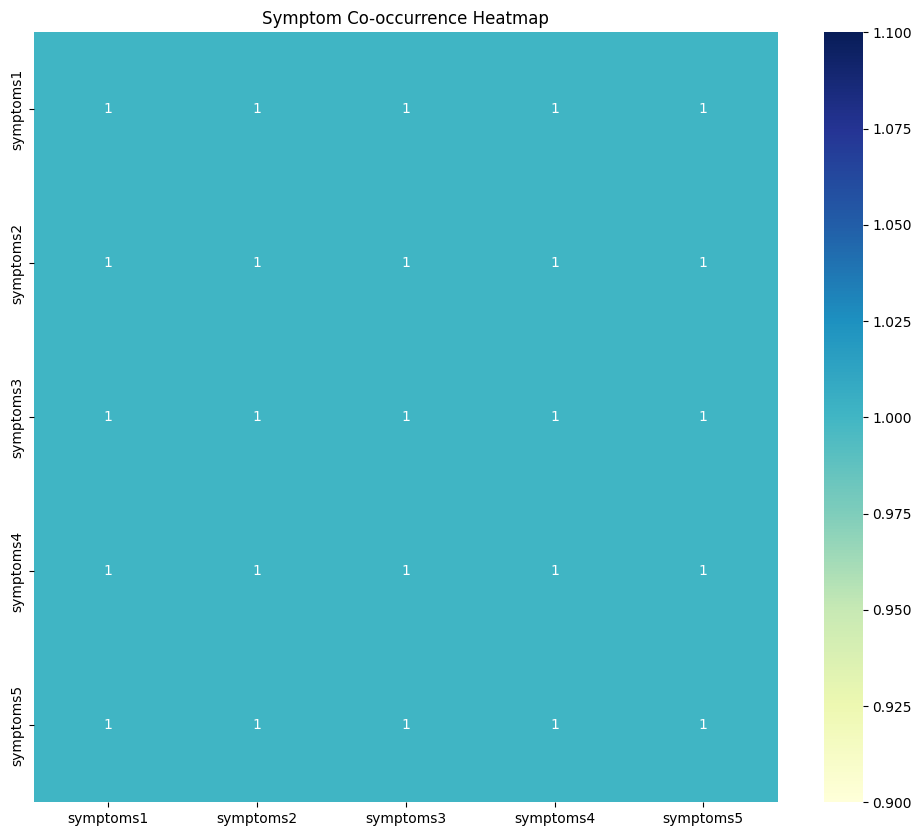

In [19]:
# Displaying the Heatmap of symptom co-occurrence
symptom_co_occurrence = data[symptoms].notna().T.dot(data[symptoms].notna())
plt.figure(figsize=(12, 10))
sns.heatmap(symptom_co_occurrence, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Symptom Co-occurrence Heatmap')
plt.show()

<h2 style="color:blue">Feature and Target Pre-processing</h2>

In [20]:
# Defining feature and target variable
X = data.drop('Dangerous', axis=1)
y = data['Dangerous']

In [21]:
# Ensuring all data is numeric and without NaN
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AnimalName       1068 non-null   int32 
 1   symptoms1        1068 non-null   int32 
 2   symptoms2        1068 non-null   int32 
 3   symptoms3        1068 non-null   int32 
 4   symptoms4        1068 non-null   int32 
 5   symptoms5        1068 non-null   int32 
 6   Type_of_Disease  1068 non-null   object
dtypes: int32(6), object(1)
memory usage: 41.7+ KB


In [22]:
y.value_counts()

Dangerous
1.0    978
0.0     90
Name: count, dtype: int64

In [23]:
# Identifying categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating column transformer with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # To keep numeric columns unchanged
)

# Preprocessing features
X_processed = preprocessor.fit_transform(X)

# Resampling to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [24]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2 style="color:blue">Modeling and Evaluation</h2>

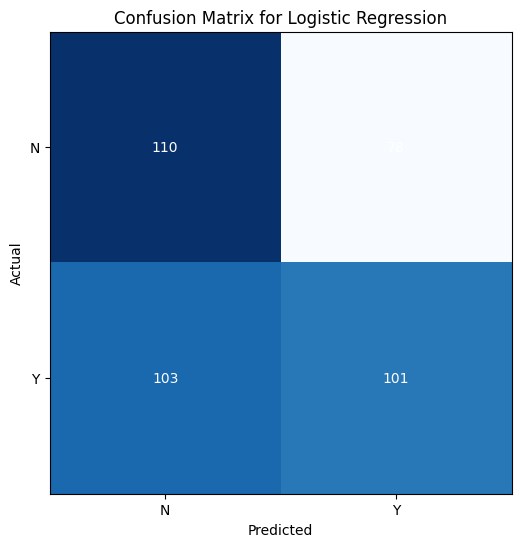

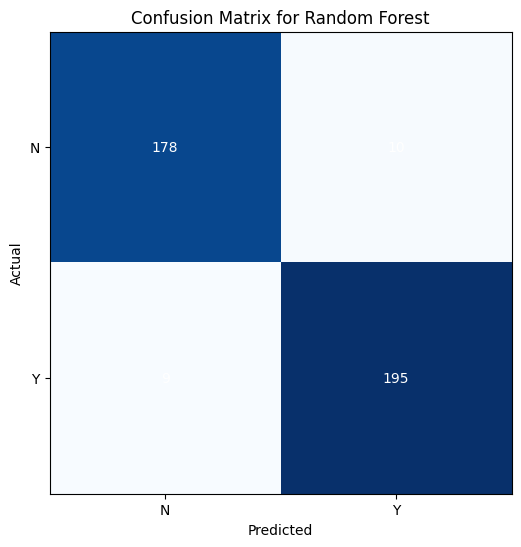

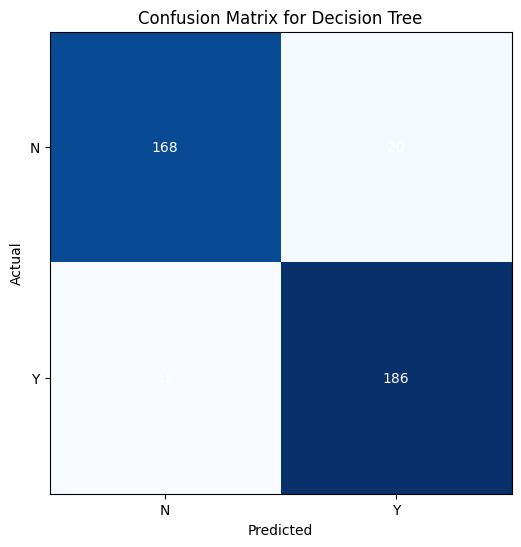

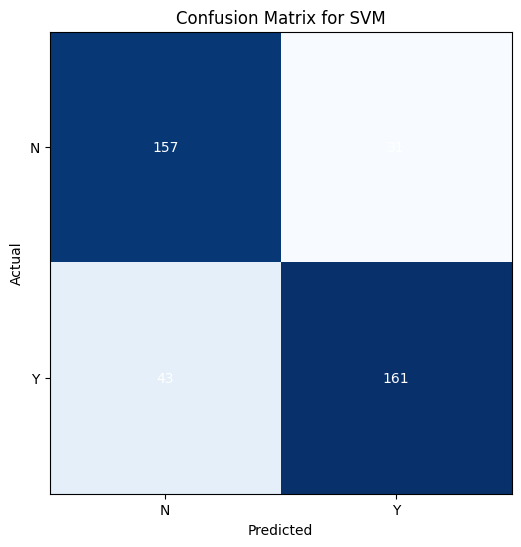

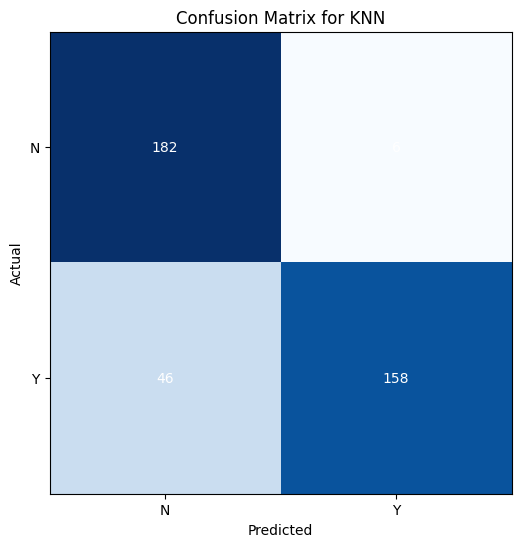

In [25]:
# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

best_model = None
best_score = 0
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    })
    
    if roc_auc > best_score:
        best_score = roc_auc
        best_model = model
    
    
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred)
    ax.imshow(cm, cmap='Blues')
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    tick_marks = np.arange(len(np.unique(y_test)))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(['N', 'Y'])
    ax.set_yticklabels(['N', 'Y'])
    for i in range(len(np.unique(y_test))):
        for j in range(len(np.unique(y_test))):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()

In [26]:
# Displaying the Model results in a table
df_results = pd.DataFrame(results)
df_results = df_results[['Model', 'Accuracy', 'F1-Score', 'ROC AUC']]
df_results = df_results.sort_values(by='ROC AUC', ascending=False)
print(df_results)

                 Model  Accuracy  F1-Score   ROC AUC
1        Random Forest  0.951531  0.953545  0.951345
2        Decision Tree  0.903061  0.907317  0.902691
4                  KNN  0.867347  0.858696  0.871297
3                  SVM  0.811224  0.813131  0.812161
0  Logistic Regression  0.538265  0.527415  0.540102


<Figure size 1200x800 with 0 Axes>

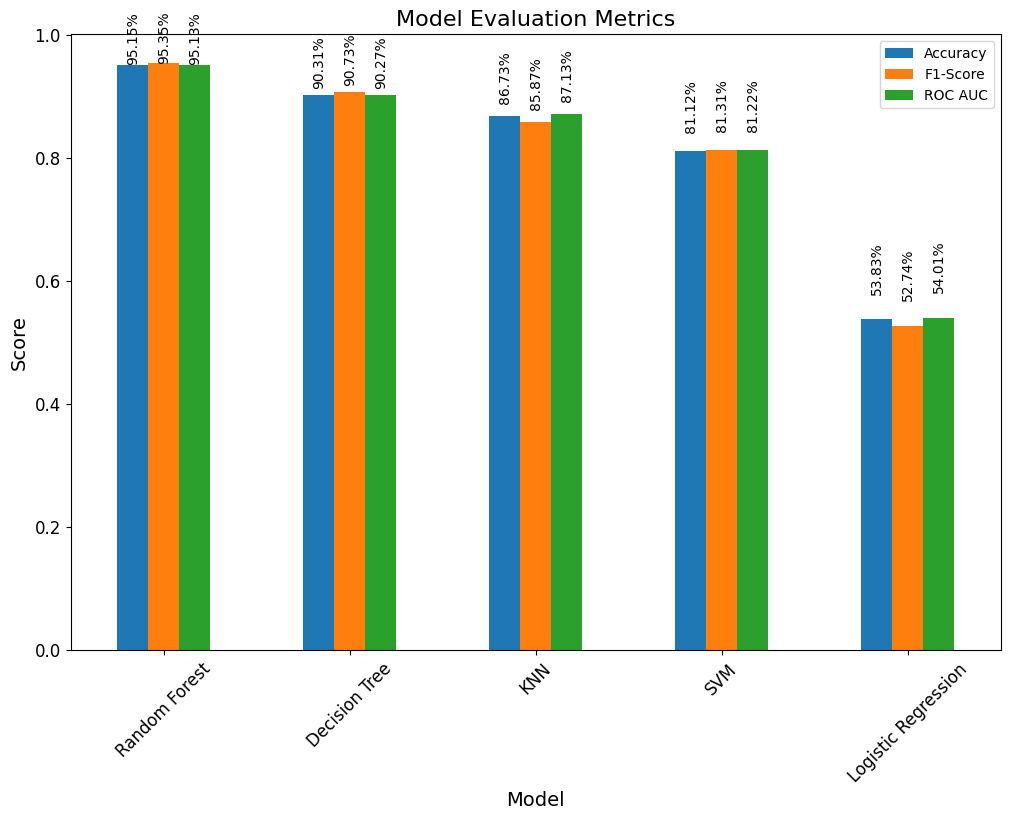

In [27]:
# Plotting the results
def autolabel(rects):
    """Attach a text label above each bar in _barh, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        label_x = rect.get_x() + rect.get_width() / 2  # Center the label horizontally
        label_y = height + (0.01 * i)  # Adjust the vertical offset based on the index
        ax.text(label_x, label_y, '{:.2%}'.format(height),
                ha='center', va='bottom', fontsize=10,
                rotation=90)  # Rotate the label 90 degrees to make it vertical

plt.figure(figsize=(12, 8))
ax = df_results.plot(x='Model', kind='bar', y=['Accuracy', 'F1-Score', 'ROC AUC'], figsize=(12, 8))
plt.title('Model Evaluation Metrics', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

autolabel(ax.containers[0])
autolabel(ax.containers[1])
autolabel(ax.containers[2])

plt.show()

In [28]:
# Printing the best model
print(f"The best performing model based on accuracy is: {df_results.iloc[0]['Model']}")

The best performing model based on accuracy is: Random Forest


In [29]:
for model_name, model in models.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88       188
         1.0       0.96      0.77      0.86       204

    accuracy                           0.87       392
   macro avg       0.88      0.87      0.87       392
weighted avg       0.88      0.87      0.87       392


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88       188
         1.0       0.96      0.77      0.86       204

    accuracy                           0.87       392
   macro avg       0.88      0.87      0.87       392
weighted avg       0.88      0.87      0.87       392


Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88       188
         1.0       0.96      0.77      0.86       204

    accuracy                           0.87       3

In [30]:
# Saving the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [31]:
# Evaluating the best model
y_pred = best_model.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       188
         1.0       0.95      0.96      0.95       204

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392

Confusion Matrix:
 [[178  10]
 [  9 195]]


In [32]:
# Loading the saved model
try:
    model = joblib.load('best_model.pkl')
except FileNotFoundError:
    print("Error: 'best_model.pkl' not found. Please make sure the model file is in the same directory as this script.")
    exit()

# Getting the number of features
num_features = model.n_features_in_

print(f"The number of features in the saved model is: {num_features}")

The number of features in the saved model is: 9
